In [243]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv("/kaggle/input/dataset/train.csv", encoding='latin1')

print("\nThe description of the data set：")
data.describe()
data.info()
data


The description of the data set：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1257 non-null   int64 
 1   Age                       1257 non-null   int64 
 2   Attrition                 1257 non-null   object
 3   BusinessTravel            1257 non-null   object
 4   DailyRate                 1257 non-null   int64 
 5   Department                1257 non-null   object
 6   DistanceFromHome          1257 non-null   int64 
 7   Education                 1257 non-null   int64 
 8   EducationField            1257 non-null   object
 9   EmployeeCount             1257 non-null   int64 
 10  EnvironmentSatisfaction   1257 non-null   int64 
 11  Gender                    1257 non-null   object
 12  HourlyRate                1257 non-null   int64 
 13  JobInvolvement            1257 non-null   in

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1446447,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,1,...,1,80,1,16,2,4,1,0,0,0
1,1252790,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,...,1,80,0,10,2,3,10,8,3,7
2,1246982,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,...,1,80,0,20,2,3,4,3,1,3
3,1824855,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,1,...,3,80,3,20,3,3,20,8,3,8
4,1359967,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,1,...,4,80,1,22,2,3,12,11,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1820725,30,No,Travel_Rarely,911,Neurology,1,2,Medical,1,...,3,80,0,12,6,2,12,8,1,7
1253,1162185,28,Yes,Travel_Frequently,773,Maternity,6,3,Life Sciences,1,...,4,80,1,3,2,3,3,1,0,2
1254,1431094,26,No,Travel_Rarely,583,Maternity,4,2,Life Sciences,1,...,2,80,0,8,2,2,8,5,2,2
1255,1533398,25,Yes,Travel_Rarely,383,Cardiology,9,2,Life Sciences,1,...,1,80,0,6,2,3,3,2,2,2


## From observing the dataset, it can be noted that attributes are divided into continuous and categorical types. Printing reports for data of both types of attributes.

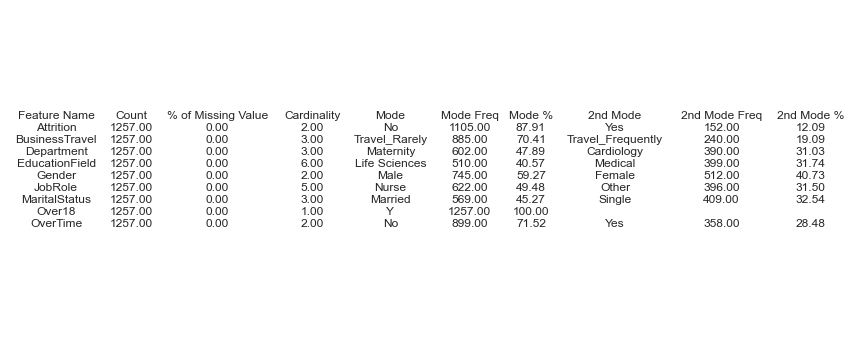

In [244]:
categorical_attributes = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 

                           'MaritalStatus', 'Over18', 'OverTime'] 

result_data_cat = [] 

for feature_name in categorical_attributes: 

    count = data[feature_name].count() 

    missing_percentage = (data[feature_name].isnull().sum() / len(data)) * 100 

    cardinality = data[feature_name].nunique() 

    mode_series = data[feature_name].mode() 

     

    if not mode_series.empty: 

        mode_val = mode_series.iloc[0] 

        mode_freq = data[feature_name].value_counts().iloc[0] 

        mode_percentage = (mode_freq / len(data)) * 100 

    else: 

        mode_val = None 

        mode_freq = None 

        mode_percentage = None 

  
    if cardinality > 1: 

        second_mode_series = data[feature_name].value_counts().iloc[1:] 

        if not second_mode_series.empty: 

            second_mode_val = second_mode_series.index[0] 

            second_mode_freq = second_mode_series.iloc[0] 

            second_mode_percentage = (second_mode_freq / len(data)) * 100 

        else: 

            second_mode_val = None 

            second_mode_freq = None 

            second_mode_percentage = None 

    else: 

        second_mode_val = None 

        second_mode_freq = None 

        second_mode_percentage = None 

    result_data_cat.append([feature_name, f"{count:.2f}", f"{missing_percentage:.2f}", f"{cardinality:.2f}", 

                            '' if mode_val is None else f"{mode_val}", f"{mode_freq:.2f}", f"{mode_percentage:.2f}", 

                            '' if second_mode_val is None else f"{second_mode_val}",  

                            '' if second_mode_freq is None else f"{second_mode_freq:.2f}",  

                            '' if second_mode_percentage is None else f"{second_mode_percentage:.2f}"]) 

  

# 创建结果DataFrame 

result_df_cat = pd.DataFrame(result_data_cat, columns=['Feature Name', 'Count', '% of Missing Value', 'Cardinality', 

                                                       'Mode', 'Mode Freq', 'Mode %', 

                                                       '2nd Mode', '2nd Mode Freq', '2nd Mode %']) 

  


fig_cat, ax_cat = plt.subplots(figsize=(10, 6)) 

ax_cat.axis('off')

table_cat = plt.table(cellText=result_df_cat.values, 

                      colLabels=result_df_cat.columns, 

                      cellLoc='center', 

                      loc='center', 

                      cellColours=[['#f0f0f0'] * len(result_df_cat.columns)] * len(result_df_cat), 

                      colColours=['#f0f0f0'] * len(result_df_cat.columns), 

                      edges='open') 


table.auto_set_font_size(False) 

table.set_fontsize(15) 

table.scale(2, 2) 

table_cat.auto_set_column_width([0] + list(range(1, len(result_df_cat.columns)))) 

plt.show() 
 

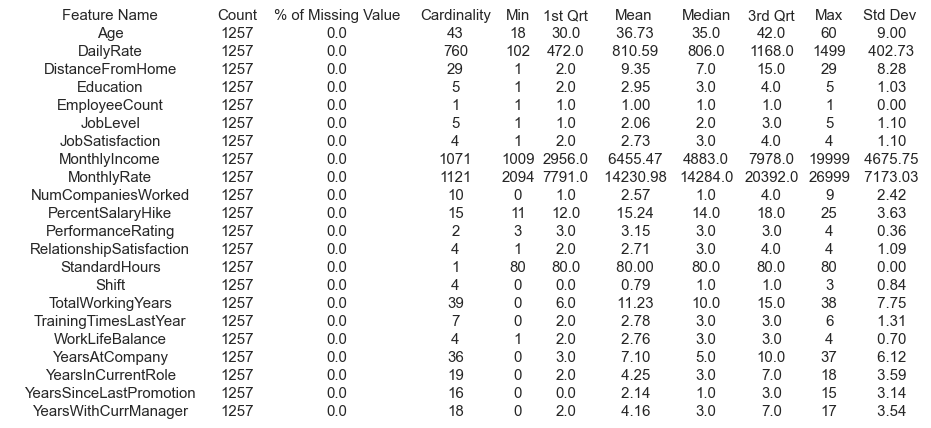

In [245]:
import matplotlib.pyplot as plt 
continuous_attributes = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel', 

                          'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 

                          'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 

                          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 

                          'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

result_data = []   


for feature_name in continuous_attributes: 

    count = data[feature_name].count() 

    missing_percentage = (data[feature_name].isnull().sum() / len(data)) * 100 

    cardinality = data[feature_name].nunique() 

    minimum = data[feature_name].min() 

    q1 = data[feature_name].quantile(0.25) 

    mean = data[feature_name].mean() 

    median = data[feature_name].median() 

    q3 = data[feature_name].quantile(0.75) 

    maximum = data[feature_name].max() 

    std_dev = data[feature_name].std() 

    result_data.append([feature_name, count, missing_percentage, cardinality, minimum, q1, f"{mean: .2f}", median, q3, maximum, f"{std_dev: .2f}"]) 


result_df = pd.DataFrame(result_data, columns=['Feature Name', 'Count', '% of Missing Value', 'Cardinality', 

                                               'Min', '1st Qrt', 'Mean', 'Median', '3rd Qrt', 'Max', 'Std Dev']) 


fig, ax = plt.subplots(figsize=(10, 6)) 

ax.axis('off')

table = plt.table(cellText=result_df.values, 

                  colLabels=result_df.columns, 

                  cellLoc='center', 

                  loc='center', 

                  cellColours=[['#f0f0f0'] * len(result_df.columns)] * len(result_df), 

                  colColours=['#f0f0f0'] * len(result_df.columns), 

                  edges='open') 

  
table.auto_set_font_size(True) 

table.set_fontsize(15) 

table.scale(1.5, 1.5) 

table.auto_set_column_width([0] + list(range(1, len(result_df.columns))))   

plt.show() 

In [246]:
low_cardinality_features = ['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeID'] 
data = data.drop(low_cardinality_features, axis=1) 
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,No,Non-Travel,1225,Maternity,2,4,Life Sciences,4,Female,...,3,1,1,16,2,4,1,0,0,0
1,37,No,Travel_Rarely,674,Maternity,13,3,Medical,1,Male,...,3,1,0,10,2,3,10,8,3,7
2,49,No,Travel_Frequently,1475,Maternity,28,2,Life Sciences,1,Male,...,4,1,0,20,2,3,4,3,1,3
3,50,No,Travel_Rarely,1207,Maternity,28,1,Medical,4,Male,...,3,3,3,20,3,3,20,8,3,8
4,50,No,Travel_Rarely,939,Maternity,24,3,Life Sciences,4,Male,...,3,4,1,22,2,3,12,11,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,30,No,Travel_Rarely,911,Neurology,1,2,Medical,4,Male,...,3,3,0,12,6,2,12,8,1,7
1253,28,Yes,Travel_Frequently,773,Maternity,6,3,Life Sciences,3,Male,...,3,4,1,3,2,3,3,1,0,2
1254,26,No,Travel_Rarely,583,Maternity,4,2,Life Sciences,3,Male,...,4,2,0,8,2,2,8,5,2,2
1255,25,Yes,Travel_Rarely,383,Cardiology,9,2,Life Sciences,1,Male,...,3,1,0,6,2,3,3,2,2,2


In [247]:
test_data = pd.read_csv("/kaggle/input/dataset/test.csv", encoding='latin1')
low_cardinality_features = ['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeID'] 
test_data = test_data.drop(low_cardinality_features, axis=1) 
test_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,NaN,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,37,NaN,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
2,29,NaN,Travel_Rarely,153,Maternity,15,2,Life Sciences,4,Female,...,3,4,0,10,3,3,9,5,0,8
3,34,NaN,Travel_Rarely,1346,Maternity,19,2,Medical,2,Male,...,3,3,1,3,2,3,2,2,1,2
4,22,NaN,Non-Travel,1123,Maternity,16,2,Medical,4,Male,...,3,2,2,1,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,25,NaN,Travel_Rarely,622,Cardiology,13,1,Medical,2,Male,...,3,3,0,7,1,3,7,4,0,6
415,24,NaN,Travel_Frequently,535,Cardiology,24,3,Medical,4,Male,...,3,3,2,3,3,3,2,2,2,1
416,29,NaN,Travel_Rarely,352,Neurology,6,1,Medical,4,Male,...,3,4,0,1,3,3,1,0,0,0
417,35,NaN,Travel_Rarely,144,Neurology,22,3,Life Sciences,4,Male,...,3,3,0,6,2,3,5,4,4,3


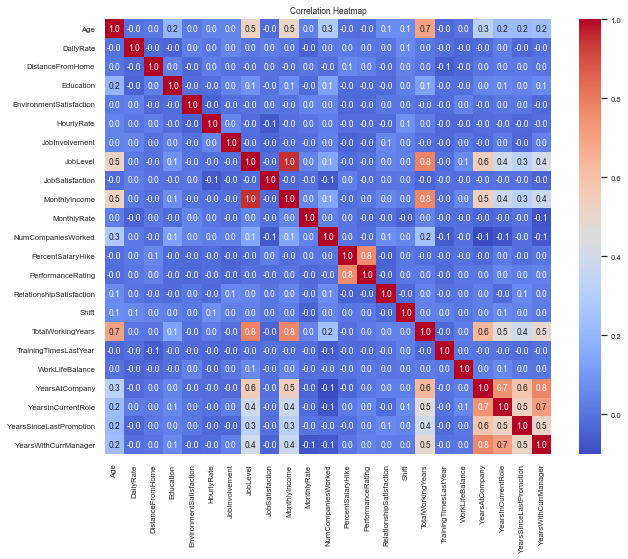

In [248]:
correlation_matrix = data.corr() 

sns.set(font_scale=0.7)

plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f") 

plt.title("Correlation Heatmap") 

plt.show() 

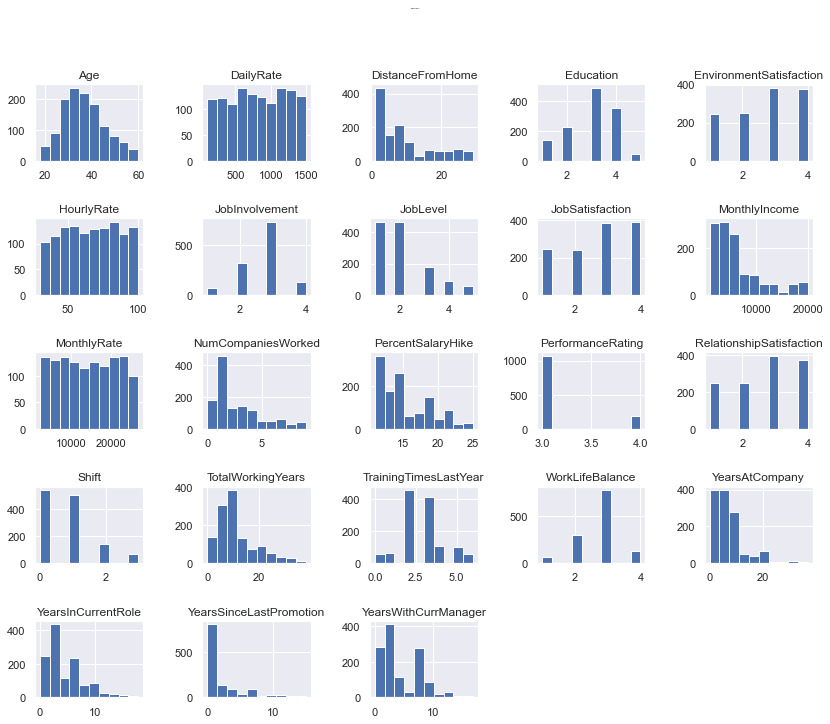

In [249]:
sns.set(font_scale=1)
data.hist(figsize=(12, 10))
plt.suptitle("Histograms", y=1.02, size=1.9) 

plt.tight_layout(pad=2.0) 

plt.show()   

In [250]:
from sklearn.feature_selection import mutual_info_classif 

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

for column in data.select_dtypes(include=['object']).columns: 

    data[column] = le.fit_transform(data[column]) 


for column in test_data.select_dtypes(include=['object']).columns: 

    test_data[column] = le.fit_transform(test_data[column]) 
  

X = data.drop('Attrition', axis=1) 

Y = data['Attrition'] 


correlation_scores = X.corrwith(Y) 

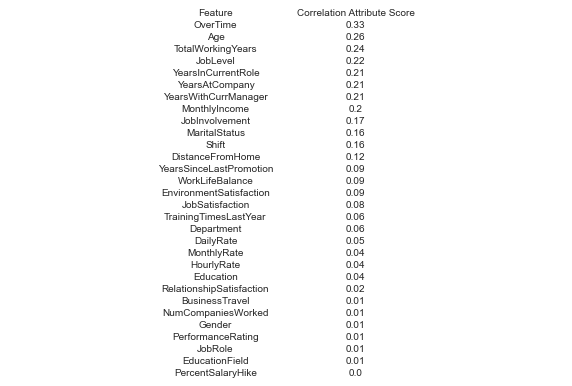

In [251]:
scores_df = pd.DataFrame({ 

    'Feature': X.columns, 

    'Correlation Attribute Score': abs(correlation_scores)
}) 


scores_df = scores_df.round({'Correlation Attribute Score': 2})   



result_df = scores_df[['Feature', 'Correlation Attribute Score']] 
  

result_df = result_df.sort_values(by='Correlation Attribute Score', ascending=False) 

  
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.axis('off')


table = ax.table(cellText=result_df.values, 

                 colLabels=result_df.columns, 

                 cellLoc='center', 

                 loc='center', 

                 cellColours=[['#f0f0f0'] * len(result_df.columns)] * len(result_df), 

                 colColours=['#f0f0f0'] * len(result_df.columns), 

                 edges='open') 
  
table.auto_set_font_size(False) 

table.set_fontsize(10) 

table.auto_set_column_width([0] + list(range(1, len(result_df.columns)))) 
  

plt.show() 

In [252]:
gain_ratio_scores = mutual_info_classif(X, Y) 

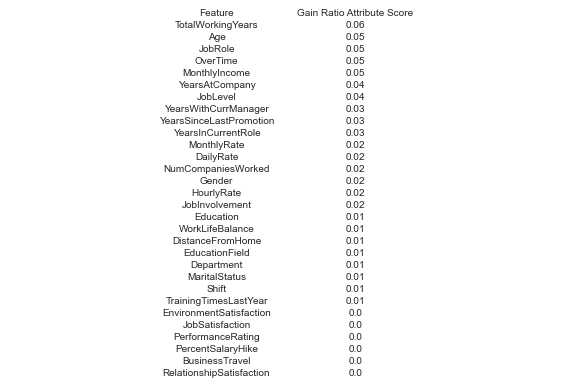

In [253]:
scores_df1 = pd.DataFrame({ 

    'Feature': X.columns, 

    'Gain Ratio Attribute Score': gain_ratio_scores
}) 

scores_df1 = scores_df1.round({'Gain Ratio Attribute Score': 2})   

result_df1 = scores_df1[['Feature', 'Gain Ratio Attribute Score']] 

result_df1 = result_df1.sort_values(by='Gain Ratio Attribute Score', ascending=False) 

fig, ax = plt.subplots(figsize=(10, 6)) 

ax.axis('off') 


table = ax.table(cellText=result_df1.values, 

                 colLabels=result_df1.columns, 

                 cellLoc='center', 

                 loc='center', 

                 cellColours=[['#f0f0f0'] * len(result_df1.columns)] * len(result_df1), 

                 colColours=['#f0f0f0'] * len(result_df1.columns), 

                 edges='open') 

  
table.auto_set_font_size(False) 

table.set_fontsize(10) 

table.auto_set_column_width([0] + list(range(1, len(result_df1.columns))))   

plt.show() 

In [254]:
symmetrical_uncertainty_scores = mutual_info_classif(X, Y, discrete_features='auto') 

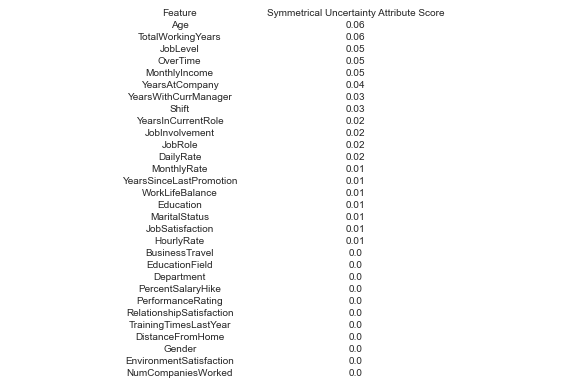

In [255]:
scores_df2 = pd.DataFrame({ 

    'Feature': X.columns, 

    'Symmetrical Uncertainty Attribute Score': symmetrical_uncertainty_scores
}) 


scores_df2 = scores_df2.round({'Symmetrical Uncertainty Attribute Score': 2})   

result_df2 = scores_df2[['Feature', 'Symmetrical Uncertainty Attribute Score']] 

result_df2 = result_df2.sort_values(by='Symmetrical Uncertainty Attribute Score', ascending=False) 

fig, ax = plt.subplots(figsize=(10, 6)) 

ax.axis('off') 

table = ax.table(cellText=result_df2.values, 

                 colLabels=result_df2.columns, 

                 cellLoc='center', 

                 loc='center', 

                 cellColours=[['#f0f0f0'] * len(result_df2.columns)] * len(result_df2), 

                 colColours=['#f0f0f0'] * len(result_df2.columns), 

                 edges='open') 

  
table.auto_set_font_size(False) 

table.set_fontsize(10) 

table.auto_set_column_width([0] + list(range(1, len(result_df2.columns)))) 


plt.show() 

In [256]:
top_features = result_df.head(15)['Feature']
print(top_features)

OverTime                                  OverTime
Age                                            Age
TotalWorkingYears                TotalWorkingYears
JobLevel                                  JobLevel
YearsInCurrentRole              YearsInCurrentRole
YearsAtCompany                      YearsAtCompany
YearsWithCurrManager          YearsWithCurrManager
MonthlyIncome                        MonthlyIncome
JobInvolvement                      JobInvolvement
MaritalStatus                        MaritalStatus
Shift                                        Shift
DistanceFromHome                  DistanceFromHome
YearsSinceLastPromotion    YearsSinceLastPromotion
WorkLifeBalance                    WorkLifeBalance
EnvironmentSatisfaction    EnvironmentSatisfaction
Name: Feature, dtype: object


In [257]:
train_data = pd.read_csv("/kaggle/input/dataset/train.csv", encoding='latin1')
test_data = pd.read_csv("/kaggle/input/dataset/test.csv", encoding='latin1')

le = LabelEncoder() 

for column in train_data.select_dtypes(include=['object']).columns: 

    train_data[column] = le.fit_transform(train_data[column]) 


for column in test_data.select_dtypes(include=['object']).columns: 

    test_data[column] = le.fit_transform(test_data[column]) #No为0，Yes为1


X_train = train_data.iloc[:len(train_data), :][selected_features] 

y_train = train_data.iloc[:len(train_data), :]['Attrition']   

X_test = test_data[selected_features]

In [259]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 创建 SVM 模型
svm_model = SVC(kernel='linear')  # 这里使用线性核，你也可以根据需要选择其他核函数

# 将训练数据集划分为训练集和验证集（可选）
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 训练模型
svm_model.fit(X_train_split, y_train_split)
# svm_model.fit(X_train, y_train, feature_names=list(X_train.columns))
# 如果有验证集，可以在验证集上评估模型性能
if 'X_val_split' in locals():
    y_val_pred = svm_model.predict(X_val_split)
    accuracy_val = accuracy_score(y_val_split, y_val_pred)
    print(f"Validation Accuracy: {accuracy_val}")

# 使用训练好的模型进行预测
y_test_pred = svm_model.predict(X_test)
# 打印预测结果
print(y_test_pred)

# Create the result DataFrame 

employee_ids = test_data['EmployeeID'] 

result_df = pd.DataFrame({'EmployeeID': employee_ids, 'Attrition': y_test_pred.flatten()}) 


# Map 0 to 'No' and 1 to 'Yes' 

result_df['Attrition'] = result_df['Attrition'].map({0.0: 'No', 1.0: 'Yes'}) 


result_df.to_csv('attrition_predictions_SVM.csv', index=False) 

Validation Accuracy: 0.9325396825396826
[0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1]


In [260]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

dt_classifier = DecisionTreeClassifier(random_state = 42)

dt_classifier.fit(X_train_dt, y_train_dt)

y_pred_dt = dt_classifier.predict(X_test_dt)

accuracy = accuracy_score(y_test_dt, y_pred_dt)
classification_rep = classification_report(y_test_dt, y_pred_dt)

# 打印评估结果 ---> 对于训练集中分割出来的测试集进行评估
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# 使用训练好的模型进行预测
y_test_pred_dt = dt_classifier.predict(X_test)

# 打印预测结果
print(y_test_pred_dt)

# Create the result DataFrame 

employee_ids = test_data['EmployeeID'] 

result_df = pd.DataFrame({'EmployeeID': employee_ids, 'Attrition': y_test_pred_dt.flatten()}) 


# Map 0 to 'No' and 1 to 'Yes' 

result_df['Attrition'] = result_df['Attrition'].map({0.0: 'No', 1.0: 'Yes'}) 


result_df.to_csv('attrition_predictions_DT.csv', index=False) 

Accuracy: 0.9007936507936508
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       231
           1       0.41      0.43      0.42        21

    accuracy                           0.90       252
   macro avg       0.68      0.69      0.68       252
weighted avg       0.90      0.90      0.90       252

[0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0